In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

matplotlib.rc("axes", unicode_minus = False)

In [3]:
df1 = pd.read_csv("01 Oxidation.csv")
df2 = pd.read_csv("02 Photo_softbake.csv")
df3 = pd.read_csv("03 Photo_lithograpy.csv")
df4 = pd.read_csv("04 Etching.csv")
df5 = pd.read_csv("05 Ion_Implantation.csv")
df6 = pd.read_csv("06 Inspect.csv")

In [4]:
df = pd.merge(df1, df2, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df3, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df4, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df5, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])
df = pd.merge(df, df6, how='left', on=['No_Die','Lot_Num', 'Wafer_Num','Datetime'])

In [5]:
df.dropna(subset="Thin F2", inplace=True) # 다른 변수들과의 연관성을 찾지못함, 한 행에 여러 열들 결측값 가짐
pd.set_option('display.max_row', 200)
pd.set_option('display.max_columns', 200)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1702 entries, 0 to 1703
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No_Die               1702 non-null   object 
 1   Ox_Chamber           1702 non-null   int64  
 2   process              1702 non-null   object 
 3   type                 1702 non-null   object 
 4   Temp_OXid            1702 non-null   float64
 5   Vapor                1702 non-null   object 
 6   ppm                  1702 non-null   float64
 7   Pressure             1702 non-null   float64
 8   Oxid_time            1702 non-null   int64  
 9   thickness            1702 non-null   float64
 10  Lot_Num              1702 non-null   int64  
 11  Wafer_Num            1702 non-null   int64  
 12  Datetime             1702 non-null   object 
 13  photo_soft_Chamber   1702 non-null   int64  
 14  process 2            1702 non-null   object 
 15  resist_target        1702 non-null   float6

In [7]:
df['Ox_Chamber'] = df['Ox_Chamber'].astype('str')
df['photo_soft_Chamber'] = df['photo_soft_Chamber'].astype('str')
df['lithography_Chamber'] = df['lithography_Chamber'].astype('str')
df['Etching_Chamber'] = df['Etching_Chamber'].astype('str')
df['Chamber_Num'] = df['Chamber_Num'].astype('str')

In [8]:
df['path'] = df['Ox_Chamber']+df['photo_soft_Chamber']+df['lithography_Chamber']+df['Etching_Chamber']+df['Chamber_Num']
df['path']

0       21111
1       21122
2       21133
3       21111
4       21122
        ...  
1699    33333
1700    11133
1701    11222
1702    11311
1703    12111
Name: path, Length: 1702, dtype: object

### 에러메시지 사용할 지 논의 필요

In [9]:
df[df['Error_message'] != 'none']['Error_message'].value_counts() # 에러 메시지 

Error_message
[['Edge-Loc']]     57
[['Loc']]          29
[['Random']]       11
[['Center']]       10
[['Scratch']]       7
[['Near-full']]     4
[['Edge-Ring']]     4
Name: count, dtype: int64

In [10]:
df.drop(df[df['Oxid_time']<0].index, inplace=True)
df.drop(df[df['Target']==0].index, inplace=True)

In [11]:
df[df['path']=='21111']

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,path
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,13,28,09-01-2023,1,Photo,1.46994,17.367,15.006,20.001,200.551,90.001,502.391,4017.144,4903.611,5.020,91.918,30.005,1,photo_li,41.676,I,365,505.388,109.628,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,1,Implantation,1.500000e+16,1.320000e+17,6.470000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,13,31,09-01-2023,1,Photo,0.42197,18.891,14.947,20.004,194.668,90.000,503.396,4045.078,4969.316,4.933,91.458,30.001,1,photo_li,32.843,G,436,537.729,108.785,1,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,1,Implantation,8.890000e+15,1.020000e+17,3.410000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,21111
6,NOLSM331137331,2,Oxidation,dry,938.276677,O2,30.24,0.211,116,714.560,13,34,09-01-2023,1,Photo,0.85768,20.701,14.978,19.999,202.194,90.000,501.572,4126.143,5060.506,5.117,88.719,29.995,1,photo_li,59.616,I,365,482.812,107.033,1,Etching,429.0,1624.0,3617.0,5728.0,70.688,50.834,1.034,1,Implantation,1.130000e+16,1.160000e+17,9.130000e+17,2.990000e+17,6.000000e+17,32499.229,102.840,916.0,157,115.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21111
89,NOLSM360149,2,Oxidation,dry,1006.213827,O2,41.81,0.195,146,708.760,14,9,09-02-2023,1,Photo,2.07859,14.626,15.012,19.998,200.903,90.001,499.243,4016.503,4929.412,4.942,90.423,29.999,1,photo_li,59.329,H,405,529.451,107.358,1,Etching,418.0,1583.0,3651.0,5709.0,70.639,51.593,1.005,1,Implantation,1.380000e+16,1.090000e+17,7.020000e+17,3.000000e+17,6.000000e+17,31167.976,104.326,888.0,159,151.0,none,[[0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 0 0 0 0 0 0 ...,21111
191,NOLSM408163,2,Oxidation,dry,871.217472,O2,40.05,0.210,45,731.855,16,3,09-04-2023,1,Photo,1.41726,12.859,15.054,20.005,199.593,89.999,501.286,4067.541,5083.958,5.085,91.638,30.006,1,photo_li,42.936,I,365,545.072,104.708,1,Etching,316.0,1505.0,3625.0,5667.0,72.581,51.849,1.068,1,Implantation,1.610000e+16,7.850000e+16,9.670000e+17,3.000000e+17,6.000000e+17,30906.701,104.338,910.0,149,187.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 0 0 0 0 0 0 ...,21111
266,NOLSM4561724,2,Oxidation,dry,1114.586608,O2,33.47,0.199,118,690.935,17,24,09-05-2023,1,Photo,0.99229,18.878,15.087,19.997,203.115,90.000,500.658,4053.513,5008.979,5.017,93.546,30.006,1,photo_li,56.005,I,365,534.682,107.168,1,Etching,511.0,1487.0,3674.0,5688.0,72.158,51.151,1.054,1,Implantation,1.350000e+16,3.970000e+16,4.450000e+17,2.990000e+17,6.000000e+17,32335.265,104.012,902.0,154,121.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,21111
371,NOLSM5071921,2,Oxidation,dry,872.388937,O2,22.14,0.213,220,710.112,19,21,09-07-2023,1,Photo,0.81782,17.509,15.029,20.001,204.091,90.000,504.091,4081.827,5102.283,5.122,93.935,30.010,1,photo_li,39.421,G,436,553.719,109.144,1,Etching,136.0,1450.0,3633.0,5702.0,71.011,51.492,1.037,1,Implantation,1.010000e+16,1.390000e+16,8.290000e+16,3.010000e+17,6.000000e+17,32298.272,103.731,928.0,156,57.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,21111
494,NOLSM919,2,Oxidation,dry,1042.243992,O2,34.58,0.203,61,712.977,1,9,23-02-2023,1,Photo,0.67979,13.463,15.016,19.998,202.294,90.000,498.370,4087.957,5099.904,5.087,92.549,29.997,1,photo

In [12]:
df[df[['Flux60s','Flux90s','Flux160s','Flux480s','Flux840s']].duplicated()]

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,photo_soft_Chamber,process 2,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,time_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,lithography_Chamber,Process 2-1,Line_CD,UV_type,Wavelength,Resolution,Energy_Exposure,Etching_Chamber,Process 3,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Chamber_Num,process4,Flux60s,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Error_message,Wafer_map,path
27,NOLSM325131,3,Oxidation,dry,1198.323089,O2,26.69,0.203,120,705.284,13,1,09-01-2023,3,Photo,1.46994,14.060,15.006,20.001,200.551,90.001,503.630,4010.591,4903.611,5.020,91.918,30.005,3,photo_li,41.676,I,365,505.388,109.628,1,Etching,340.0,1522.0,3644.0,5732.0,72.651,52.103,1.030,1,Implantation,1.500000e+16,1.320000e+17,6.470000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,141.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,33311
28,NOLSM326132,1,Oxidation,dry,959.171516,O2,30.86,0.217,137,690.800,13,2,09-01-2023,1,Photo,0.86579,13.693,15.059,19.993,199.835,89.999,502.354,4042.427,4979.082,4.937,90.976,30.005,1,photo_li,53.612,H,405,541.732,104.917,1,Etching,265.0,1513.0,3631.0,5729.0,70.267,52.004,1.038,1,Implantation,1.110000e+16,4.370000e+16,1.040000e+18,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,55.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,11111
29,NOLSM327133,1,Oxidation,dry,1175.582493,O2,31.07,0.218,116,702.641,13,3,09-01-2023,1,Photo,0.90483,15.221,14.930,19.995,202.118,90.001,504.103,4025.856,5031.989,4.888,91.969,30.006,2,photo_li,47.598,I,365,532.200,106.632,2,Etching,411.0,1568.0,3653.0,5729.0,71.231,50.846,1.005,2,Implantation,1.040000e+16,1.510000e+16,6.470000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,96.0,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,11222
30,NOLSM328134,1,Oxidation,dry,927.505492,O2,31.04,0.196,143,704.124,13,4,09-01-2023,1,Photo,0.42197,19.114,14.947,20.004,194.668,90.000,502.088,4144.570,4969.316,4.933,91.458,30.001,3,photo_li,32.843,G,436,537.729,108.785,3,Etching,328.0,1326.0,3661.0,5718.0,71.295,51.665,1.025,3,Implantation,8.890000e+15,1.020000e+17,3.410000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,105.0,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,11333
31,NOLSM329135,1,Oxidation,wet,1120.908253,H2O,31.37,0.215,76,707.911,13,5,09-01-2023,2,Photo,1.70139,14.942,14.820,19.998,202.192,90.000,498.167,4049.729,5092.407,5.050,94.723,29.988,1,photo_li,57.370,H,405,522.143,109.913,3,Etching,219.0,1451.0,3637.0,5729.0,72.983,50.787,1.038,3,Implantation,1.670000e+16,7.880000e+16,7.260000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,79.0,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,12133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,NOLSM8483211,3,Oxidation,wet,1275.182502,H2O,45.10,0.214,21,715.498,32,11,06-03-2023,3,Photo,0.89644,16.029,15.005,19.998,204.429,90.000,504.429,4088.587,5110.734,5.114,93.622,29.996,3,photo_li,32.525,I,365,468.930,106.744,3,Etching,177.0,1510.0,3655.0,5726.0,71.550,50.601,1.015,3,Implantation,1.050000e+16,9.510000e+16,6.270000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,78.0,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 0 0 0 ...,33333
1700,NOLSM8493212,1,Oxidation,wet,1268.105427,H2O,45.07,0.215,22,707.179,32,12,06-03-2023,1,Photo,1.02384,17.587,14.949,20.000,204.266,90.000,504.266,4085.330,5106.662,5.083,93.227,29.994,1,photo_li,28.001,I,365,469.586,106.174,3,Etching,180.0,1433.0,3643.0,5690.0,70.718,50.424,1.011,3,Implantation,6.910000e+15,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,42.0,none,[[0 0 0 0 0 0 0 

### 불필요한 열 제거 - 논의 필요

In [13]:
# # 불필요한 열 제거 
# df.drop(columns=["No_Die", "Lot_Num", "Wafer_Num", "Error_message","Wafer_map"], inplace=True)

In [14]:
# 시간 데이터 datetime 유형으로 변환
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y')

In [15]:
path_count = df['path'].value_counts()
path_count

path
22222    44
13222    43
21222    42
32222    42
23222    42
11222    41
31222    35
33222    34
12222    32
12111    30
11311    30
11133    30
13111    29
12333    29
22111    29
21111    29
12311    29
21311    29
11333    29
11111    29
21133    29
13311    28
13333    28
12133    28
21333    28
32111    26
31311    26
31133    26
23333    26
23111    26
33133    26
32311    26
33311    26
23311    26
31111    26
31333    26
32133    26
22333    26
33111    25
33333    25
22311    25
22133    24
13133    22
23133    20
32333    18
12211    12
12122    12
12233    12
12322    12
13122    12
13211    12
13233    12
11322    12
11233    12
11211    12
11122    12
13322    12
22122    12
21322    12
21122    12
21233    12
22211    11
22233    11
21211    11
31233     9
23233     9
22322     9
23122     9
23211     9
23322     9
31322     9
33322     9
33233     9
33211     9
33122     9
31122     9
32322     9
32233     9
32211     9
32122     9
31211     9
Name: count, dtype: int

In [16]:
path_sum = df.groupby('path')['Target'].sum()
path_sum 

path
11111    2703.0
11122     988.0
11133    2885.0
11211    1439.0
11222    3861.0
11233    1808.0
11311    2706.0
11322     982.0
11333    2685.0
12111    2907.0
12122    1334.0
12133    2640.0
12211    1010.0
12222    3879.0
12233     767.0
12311    2809.0
12322    1299.0
12333    3462.0
13111    3269.0
13122    1474.0
13133    2637.0
13211     900.0
13222    4250.0
13233    1072.0
13311    2737.0
13322    1025.0
13333    2710.0
21111    3273.0
21122    1155.0
21133    2871.0
21211     707.0
21222    4430.0
21233    1157.0
21311    2359.0
21322     978.0
21333    3492.0
22111    3182.0
22122    1271.0
22133    3152.0
22211    1017.0
22222    4758.0
22233    1053.0
22311    2331.0
22322     784.0
22333    2943.0
23111    2833.0
23122     858.0
23133    2635.0
23211     750.0
23222    4692.0
23233     908.0
23311    2225.0
23322     710.0
23333    2271.0
31111    3423.0
31122    1274.0
31133    3169.0
31211    1494.0
31222    3861.0
31233    1213.0
31311    2846.0
31322    1382.0
313

In [17]:
# 195이상 = 불량(1), 195미만 = 양품(0)
df.loc[df['Target'] >= 195, '불량'] =1
df.loc[df['Target'] < 195, '불량'] =0

In [18]:
df['불량'].value_counts()

불량
0.0    1572
1.0     121
Name: count, dtype: int64

In [19]:
df2.describe()['resist_target']

count    1704.000000
mean        1.192038
std         0.415798
min         0.054360
25%         0.880495
50%         1.114550
75%         1.487910
max         2.394320
Name: resist_target, dtype: float64

In [20]:
df[df['path']=='21111']['Target'].mean()

112.86206896551724

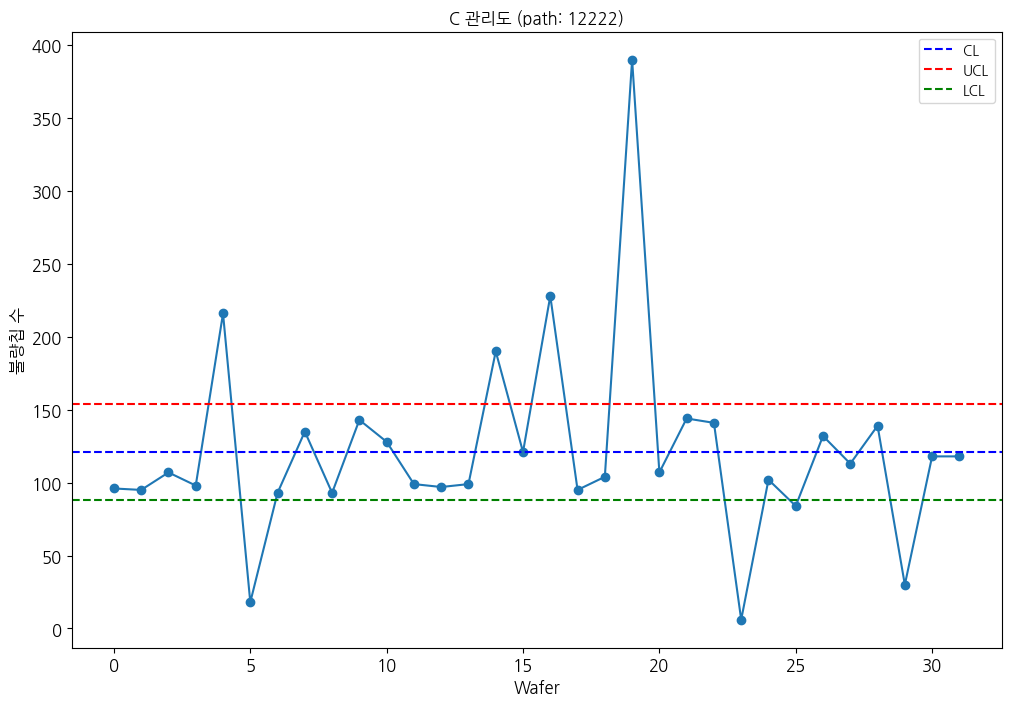

In [23]:
paths = []

for path in df['path'].unique():
    paths.append(str(path))

def calculate_control_limits(data):
    CL = data.mean()
    UCL = CL + 3 * np.sqrt(CL)
    LCL = CL - 3 * np.sqrt(CL)
    return CL, UCL, LCL


path='12222'
filtered_df = df[df['path'] == path]
    
    # CL, UCL, LCL 계산
CL, UCL, LCL = calculate_control_limits(filtered_df['Target'])
    
    # 경계선 안에 있는 값의 비율 계산
inside_limit = filtered_df[(filtered_df['Target'] >= LCL) & (filtered_df['Target'] <= UCL)]
inside_ratio = len(inside_limit) / len(filtered_df) * 100
    
    # 경계선 밖에 있는 값의 비율 계산
outside_limit = filtered_df[(filtered_df['Target'] < LCL) | (filtered_df['Target'] > UCL)]
outside_ratio = len(outside_limit) / len(filtered_df) * 100
    
    # C 관리도 그리기
plt.figure(figsize=(12, 8))
plt.plot(range(len(filtered_df)), filtered_df['Target'], marker='o', linestyle='-')
plt.axhline(y=CL, color='b', linestyle='--', label='CL')
plt.axhline(y=UCL, color='r', linestyle='--', label='UCL')
plt.axhline(y=LCL, color='g', linestyle='--', label='LCL')
    
    # 그래프 타이틀과 축 라벨 설정
plt.title(f'C 관리도 (path: {path})')
plt.xlabel('Wafer', fontsize=12)
plt.ylabel('불량칩 수', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)    
    # 범례 표시
plt.legend()
    
    # 그래프 출력
plt.show()

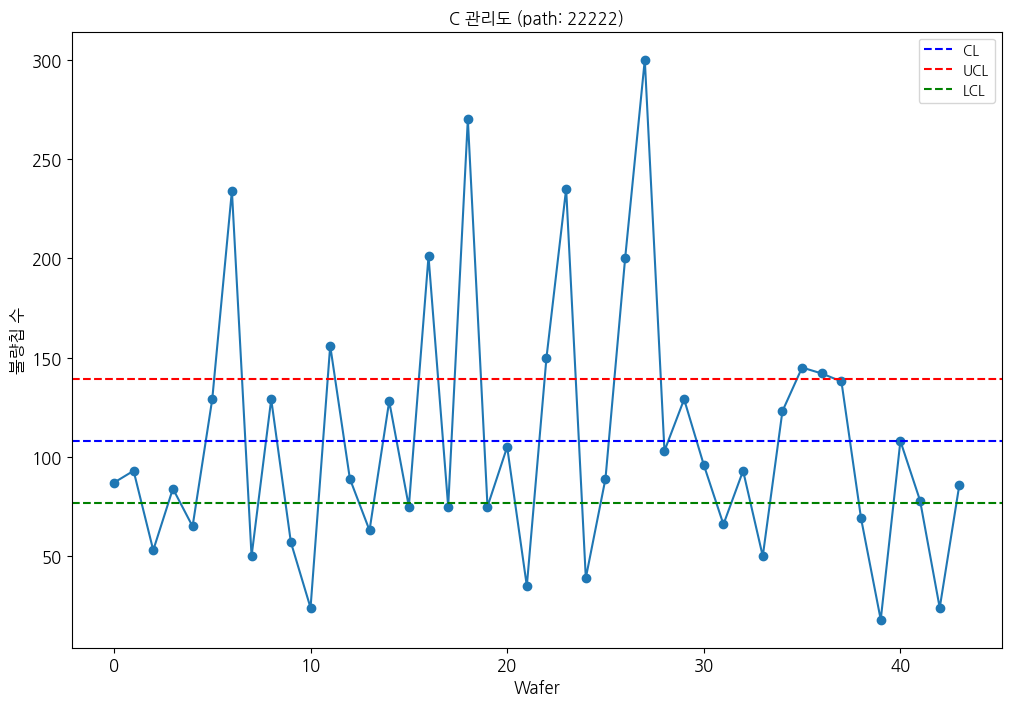

In [24]:
path='22222'
filtered_df = df[df['path'] == path]
    
    # CL, UCL, LCL 계산
CL, UCL, LCL = calculate_control_limits(filtered_df['Target'])
    
    # 경계선 안에 있는 값의 비율 계산
inside_limit = filtered_df[(filtered_df['Target'] >= LCL) & (filtered_df['Target'] <= UCL)]
inside_ratio = len(inside_limit) / len(filtered_df) * 100
    
    # 경계선 밖에 있는 값의 비율 계산
outside_limit = filtered_df[(filtered_df['Target'] < LCL) | (filtered_df['Target'] > UCL)]
outside_ratio = len(outside_limit) / len(filtered_df) * 100
    
    # C 관리도 그리기
plt.figure(figsize=(12, 8))
plt.plot(range(len(filtered_df)), filtered_df['Target'], marker='o', linestyle='-')
plt.axhline(y=CL, color='b', linestyle='--', label='CL')
plt.axhline(y=UCL, color='r', linestyle='--', label='UCL')
plt.axhline(y=LCL, color='g', linestyle='--', label='LCL')
    
    # 그래프 타이틀과 축 라벨 설정
plt.title(f'C 관리도 (path: {path})')
plt.xlabel('Wafer', fontsize=12)
plt.ylabel('불량칩 수', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
    # 범례 표시
plt.legend()
    
    # 그래프 출력
plt.show()